## Lecture 12 Formating output
This notebook looks at different methods of formating and controling output in Python.

Format output in Notebooks is also examined

In [ ]:
# New style of formatting with formatted string literals
# Examples
year = 2016
event = 'Referendum'
print(f'Results of the {year} {event}')
# Alternatives
print('Results of the',year,event)
print('Results of the '+str(year),event)
mysrt = f'Results of the {year} {event}'
mysrt

### str.format method
str.format(*args, **kwargs)**<br>
Perform a string formatting operation. The string on which this method is called can contain literal text or replacement fields delimited by braces {}. Each replacement field contains either the numeric index of a positional argument, or the name of a keyword argument. Returns a copy of the string where each replacement field is replaced with the string value of the corresponding argument.

In [ ]:
# Example
print("The sum of 1 + 2 is {0}".format(1+3))
# Better is
a = 1; b = 2;
print("The sum of {0} + {1} is {2}".format(a,b,a+b))
"The sum of {0} + {1} is {2}".format(a,b,a+b)


### Conversion examples
Examples of conversions


In [ ]:
# Example
print(hex(245))
!printenv LANG
name = '\xab \xaa \xf5' ; num = 1.2;
# \xab -- extended ASCII for <<
print('Conversion {name} and {num}')
print(f'Conversion {name!s} and |{num:<#8.2f}|')
print(f'Conversion {name!a} and |{num:>#8.2f}|')
print(f'Conversion {name!r} and |{num:#8.2e}|')
print(f'Conversion {name!r} and |{num:#8.2%}|')
print('\nAccessing attributes')
print('Coordinates: {latitude}, {longitude}'.format(latitude='37.24N', longitude='-115.81W'))

coord = {'latitude': '37.24N', 'longitude': '-115.81W'}
print('Coordinates: {latitude}, {longitude}'.format(**coord))
print(f'Coordinates {coord}')

In [ ]:
# More examples of controlling output with str.format
octets = [192, 168, 0, 1]
print('{:02X}{:02X}{:02X}{:02X}'.format(*octets))
print('{:02X} {:02X} {:02X} {:02X}'.format(*octets))

width = 5 ; st = 162 ; en = 167
for num in range(st,en): 
    for base in 'dXob':
        print('{0:{width}{base}}'.format(num, base=base, width=width), end=' ')
    print('|',chr(num),'|')     
    #print()
print('Extended ASCII')
# Notice here that end='' removed the \n character so no line feed.
for num in range(162,300,6): 
    for k in (0,1,2,3,4,5):
        # print(f'{num+k:5d} {num+k:5x} {chr(num+k)} | {num+1:5d} {num+1:5x} {chr(num+1)} | {num+2:5d} {num+2:5x} {chr(num+2)} ')
        print(f'{num+k:5d} {num+k:5x} {chr(num+k)} |',end='')
    print()


In [ ]:
# Example of floating point table
import numpy as np
print('Raw')
for ang in np.linspace(0,2*np.pi,10):
    print(ang*180/np.pi, np.sin(ang),np.cos(ang),np.tan(ang))
print('str.format')    
for ang in np.linspace(0,2*np.pi,10):
    print('{:6.2f} | {:9.6f} {:9.6f} {:9.6f}'.format(ang*180/np.pi, np.sin(ang),np.cos(ang),np.tan(ang)))
print('f<str> method')
for ang in np.linspace(0,2*np.pi,10):
    print(f'{ang*180/np.pi:6.2f} | {np.sin(ang):9.6f} {np.cos(ang):9.6f} {np.tan(ang):9.6f}')
print('Older method: More C-like')
for ang in np.linspace(0,2*np.pi,10):
    print('%6.2f | %9.6f %9.6f %9.6f' % (ang*180/np.pi, np.sin(ang),np.cos(ang),np.tan(ang)))

In [ ]:
# Adding control characters
import numpy as np
from time import sleep
for ang in np.linspace(0,2*np.pi,10):
    print(f'{ang*180/np.pi:6.2f} | {np.sin(ang):9.6f} {np.cos(ang):9.6f} {np.tan(ang):9.6f} \r',end='')
    sleep(1)


In [ ]:
def esc(code):
    # \033 is octal for <esc>
    return f'\033[{code}m'

# See https://www2.ccs.neu.edu/research/gpc/VonaUtils/vona/terminal/vtansi.htm for typs of commands
# Set Display Attributes

# Set Attribute Mode	<ESC>[{attr1};...;{attrn}m
# Sets multiple display attribute settings. The following lists standard attributes:
# 0	Reset all attributes
# 1	Bright
# 2	Dim
# 4	Underscore	
# 5	Blink
# 7	Reverse
# 8	Hidden

# 	Foreground Colours
# 30	Black
# 31	Red
# 32	Green
# 33	Yellow
# 34	Blue
# 35	Magenta
# 36	Cyan
# 37	White

# 	Background Colours
# 40	Black
# 41	Red
# 42	Green
# 43	Yellow
# 44	Blue
# 45	Magenta
# 46	Cyan
# 47	White

print('this is ', esc('31'), 'really', esc(0), ' important', sep='')
print('this is ', esc('31;1'), 'really', esc(0), ' important', sep='')
print('this is ', esc('31;2;4'), 'really', esc(0), ' important', sep='')
print('this is ', esc('34;43;1;4'), 'really', esc(0), ' important', sep='')
print('this is ', esc('34;43;1;4;7'), 'really', esc(0), ' important', sep='')
for k in range(5):
    print('this is ', esc('31;47'), 'really', esc(0), ' important  \r', end='', sep='')
    sleep(1)
    print('this is ', esc('31;47;7'), 'really', esc(0), ' important  \r', end='', sep='')
    sleep(1)


## Write table to file for use in word

In [ ]:
from tabulate import tabulate

# Write file: When can then read an format as table
wf = open('word.txt','w')
print('Creating word.txt')
wf.write('Table of sin, cos and Tan\n')
wf.write(f'Angle\tSin\tCos\tTan\n')
for ang in np.linspace(0,2*np.pi,10):
    wf.write(f'{ang*180/np.pi:6.2f}\t{np.sin(ang):9.6f}\t{np.cos(ang):9.6f}\t{np.tan(ang):9.6f}\n')
    
wf.close()
# Using 'with' construst, the file is closed once the suite is completed.
with open('word.txt') as rf:
    read_data = rf.read()

# 
print(read_data)
print('Len ',len(read_data))
#?read_data

# Other methods using tabulate (needed in Panda data frame tables as well)
table = np.zeros((10,4));
k = 0;
for ang in np.linspace(0,2*np.pi,10):
    table[k] = [ang*180/np.pi, np.sin(ang), np.cos(ang),np.tan(ang)]
    k += 1

# table = [["spam",42],["eggs",451],["bacon",0]]
headers = ["Angle", "Sin","Cos","Tan"]
print('\nfancy_grid: numbers not formatted')
print(tabulate(table, headers, tablefmt="fancy_grid"))
print('\nHTML')
print(tabulate(table, headers, tablefmt="html"))
print('\nLATEX: With format')
print(tabulate(table, headers, tablefmt="latex",floatfmt=(".2f", ".6f",".6f",".6f")))
print('\nPIPE: Compare to pandas.to_markdown')
print(tabulate(table, headers, tablefmt="pipe",floatfmt=(".2f", ".6f",".6f",".6f")))


|   Angle |       Sin |       Cos |       Tan |
|--------:|----------:|----------:|----------:|
|    0.00 |  0.000000 |  1.000000 |  0.000000 |
|   40.00 |  0.642788 |  0.766044 |  0.839100 |
|   80.00 |  0.984808 |  0.173648 |  5.671282 |
|  120.00 |  0.866025 | -0.500000 | -1.732051 |
|  160.00 |  0.342020 | -0.939693 | -0.363970 |
|  200.00 | -0.342020 | -0.939693 |  0.363970 |
|  240.00 | -0.866025 | -0.500000 |  1.732051 |
|  280.00 | -0.984808 |  0.173648 | -5.671282 |
|  320.00 | -0.642788 |  0.766044 | -0.839100 |
|  360.00 | -0.000000 |  1.000000 | -0.000000 |

## Formatting Panda Data Frames

In [ ]:
import pandas as pd
import numpy as np

constants = pd.DataFrame([('pi',np.pi),('e',np.e)],
                   columns=['name','value'])
C = constants.style.format({'name': '~~ {} ~~', 'value':'--> {:15.10f} <--'})
print(constants)
display(constants)
print(constants.to_markdown()) 
display(C)
C

Table from .to_markdown


|    | name   |   value |
|---:|:----:|-----:|
|  0 | pi  s   | 3.14159 |
|  1 | e      | 2.71828 |

More examples of Markdown
----------
Line breaks.
This line is not next but will join.

Line breaks.  
This line will break because line above has 2-spaces at end.

Bold uses **text** or __text__  
Italics uses *text* or _text_  
Bold Italics uses ***text*** or ___text___   
When no spaces _ acts differently to * e.g., A*cat*meow A_cat_meow

> Blockquotes
use a > at the start of the line.  
The block will continue until a new paragraph.

Now out of blockqoute mode.
> To have multiple paragraphs
>
> Add a > in the blank line between paragraphs.

> Nest blockquotes  
>> use >> for the indented blockquote  
>>> Keep adding > to nest even futher

Other formating elements can be used in blockquotes but use blank line before and after.  

> #### The quarterly results look great!
>
> - Revenue was off the chart.
> - Profits were higher than ever.
>
>  *Everything* is going according to **plan**.

Now try lists  
1. First item
1. Second

Or bulletted lists
* First 
* Second

- New first
    - sub first
    - next sublist
- New second



### Code blocks (or output from codes)

Sometimes you don't want fancy formatting and just want to 
show simple text or code.  Indenting by 4-spaces of \<tab> will
do this.

From code above

    print('Raw')
    for ang in np.linspace(0,2*np.pi,10):
       print(ang*180/np.pi, np.sin(ang),np.cos(ang),np.tan(ang))
    print('str.format')    
    for ang in np.linspace(0,2*np.pi,10):
       print('{:6.2f} | {:9.6f} {:9.6f} {:9.6f}'.format(ang*180/np.pi, np.sin(ang),np.cos(ang),np.tan(ang)))
    

Fenced code blocks
```
The individual test values (lines starting with C) show an interesting pattern where the double long does not show 1.2 well.  Also moving 1 at the end of 1.125 to more significant digits, the double long reverts to the short form at the number of significant digits as the double.  There seems to some issues with formatting the double long outputs.  The epsilon test does show it does have the 19 significant digits expected.  
C 1.2  ->  1.2 1.2 1.1999999999999999556 \Delta 4.7683715864721420985e-08 0.0
C 1.125000000001     ->  1.125 1.125000000001 1.1250000000010000889 
C 1.12500000000001   ->  1.125 1.12500000000001 1.125000000000009992 
C 1.125000000000001  ->  1.125 1.125000000000001 1.1250000000000011102
C 1.125              ->  1.125 1.125 1.125 \Delta 0.0 0.0
```
Now look at syntax awareness: Fortran
```fortran
       real*8 a,b,c,
      .   d,e,f
       read(*,*) a,b,c
       print a
       end
```
Or for the python code above
```python
print('Raw')
for ang in np.linspace(0,2*np.pi,10):
    print(ang*180/np.pi, np.sin(ang),np.cos(ang),np.tan(ang))
print('str.format')    
for ang in np.linspace(0,2*np.pi,10):
    print('{:6.2f} | {:9.6f} {:9.6f} {:9.6f}'.format(ang*180/np.pi, np.sin(ang),np.cos(ang),np.tan(ang)))
```

C-code can have highlighted syntax

```C
//Erf.c computes the error function and its first derivative in .25 intervals for -3 to 3

#include <math.h> //For constants and power funtions
#include <stdio.h> //For constants and power funtions
double factorial (int n);  //Factorial function
double Error(double a);  //Error function
double dError(double a);  //First Derivative of error function
int main() {
  //Print headers for outtput
  printf("Number     Error       dError\n");
  printf("_____________________________\n");
}
~~~



### Images and links

1. Open the file containing the Linux mascot.
2. Marvel at its beauty.

    ![Tux, the Linux mascot](tux.png "Linux Tux Image")
    
    But if I want to change size may need to revert to html
    <img src="tux.png" alt="drawing" width="64"/>

    >If I want to use URL then html syntax is needed. (Some markdowns allow the URL to be in the image but not here).
    ><img src="https://upload.wikimedia.org/wikipedia/commons/a/af/Tux.png" alt="drawing" width="64"/>
    
Try dragging image into cell
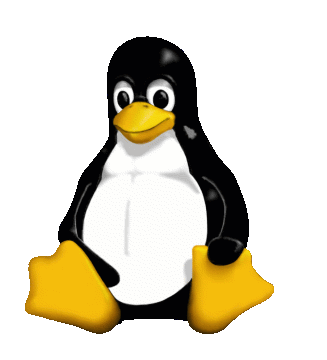
but this will probably make it through Canvas (we will see)

URL's can be imbedded the same way

Here is link to **[12.010 GitHub](https://github.com/christophernhill/fall-2021-12.010)**.

Or can be explicit in name: <https://github.com/christophernhill/fall-2021-12.010>

### Tables

Simple format for table

| Syntax | Description |
| --- | ----------- |
| Header | Title |
| Paragraph | Text |

Added horizontal rule between tables as well

--------------

With alignment control

| Syntax      | Description | Test Text     |
| :------     |    :----:   |          ---: |
| Header      | Title       | Here's this   |
| Paragraph   | Text        | And more      |

Can also use html

<table>
<thead>
<tr>
<th align="center">Syntax</th>
<th align="right">Description</th>
</tr>
</thead>
<tbody>
<tr>
<td align="center">header</td>
<td align="right">title</td>
</tr>
<td align="center">Paragraph</td>
<td align="right">text</td>
</tr> </tbody></table>


### Markdown Cheat Sheet
This sheet is from https://www.markdownguide.org/cheat-sheet/

Thanks for visiting [The Markdown Guide](https://www.markdownguide.org)!

This Markdown cheat sheet provides a quick overview of all the Markdown syntax elements. It can’t cover every edge case, so if you need more information about any of these elements, refer to the reference guides for [basic syntax](https://www.markdownguide.org/basic-syntax) and [extended syntax](https://www.markdownguide.org/extended-syntax).

## Basic Syntax

These are the elements outlined in John Gruber’s original design document. All Markdown applications support these elements.

### Heading

# H1
## H2
### H3

### Bold

**bold text**

### Italic

*italicized text*

### Blockquote

> blockquote

### Ordered List

1. First item
2. Second item
3. Third item

### Unordered List

- First item
- Second item
- Third item

### Code

`code`

### Horizontal Rule

---

### Link

[Markdown Guide](https://www.markdownguide.org)

### Image

![alt text](https://www.markdownguide.org/assets/images/tux.png)

## Extended Syntax

These elements extend the basic syntax by adding additional features. Not all Markdown applications support these elements.

### Table

| Syntax | Description |
| ----------- | ----------- |
| Header | Title |
| Paragraph | Text |

### Fenced Code Block

```
{
  "firstName": "John",
  "lastName": "Smith",
  "age": 25
}
```

### Footnote

Here's a sentence with a footnote. [^1]

[^1]: This is the footnote.

### Heading ID

### My Great Heading {#custom-id}

### Definition List

term
: definition

### Strikethrough

~~The world is flat.~~

### Task List

- [x] Write the press release
- [ ] Update the website
- [ ] Contact the media




### Equations in Markdown

Basic latex syntax can be used.  
Equation  
$\alpha = \frac{n}{(n-k)!}$

$\beta = \int_0^\infty \mathrm{e}^{-x} \mathrm{d}x$

$\overrightarrow{AB}$  $\ddot{a}$

You can use $\LaTeX$ to typeset formulas. A formula can be displayed inline, e.g. $e=mc^2$ or as a block:
$$\int_\Omega  \nabla u \cdot  \nabla v~dx = \int_\Omega  fv~dx$$
Also check out this [LaTeX introduction](https://en.wikibooks.org/wiki/LaTeX/Mathematics).

These days this also works in Word.